<a href="https://colab.research.google.com/github/smucon-dev/ml_basics/blob/main/Perceptron_TF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

**Generate two clusters of datapoints**

In [32]:
num_samples_per_class = 100
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5], [0.5, 1]],
    size=num_samples_per_class
)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5], [0.5, 1]],
    size=num_samples_per_class
)
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"), np.ones((num_samples_per_class, 1), dtype='float32')))

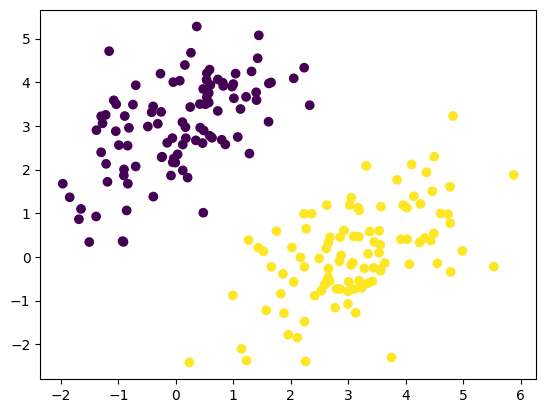

In [37]:
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])

**Create a Model class**

In [57]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

def model(inputs):
  return tf.matmul(inputs, W) + b

def square_loss(targets, predictions):
  per_sample_losses = tf.square(targets - predictions)
  return tf.reduce_mean(per_sample_losses)

learning_rate = 0.1

def training_step(inputs, targets):
  with tf.GradientTape() as tape:
    predictions = model(inputs)
    loss = square_loss(targets, predictions)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

epochs = 40
for step in range(epochs):
  loss = training_step(inputs, targets)
  print(f'loss at step {step}: {loss:.4f}')

loss at step 0: 9.0595
loss at step 1: 1.9947
loss at step 2: 0.5623
loss at step 3: 0.2427
loss at step 4: 0.1644
loss at step 5: 0.1391
loss at step 6: 0.1260
loss at step 7: 0.1161
loss at step 8: 0.1077
loss at step 9: 0.1001
loss at step 10: 0.0932
loss at step 11: 0.0870
loss at step 12: 0.0813
loss at step 13: 0.0761
loss at step 14: 0.0714
loss at step 15: 0.0671
loss at step 16: 0.0632
loss at step 17: 0.0596
loss at step 18: 0.0564
loss at step 19: 0.0535
loss at step 20: 0.0508
loss at step 21: 0.0484
loss at step 22: 0.0462
loss at step 23: 0.0442
loss at step 24: 0.0423
loss at step 25: 0.0407
loss at step 26: 0.0392
loss at step 27: 0.0378
loss at step 28: 0.0365
loss at step 29: 0.0354
loss at step 30: 0.0343
loss at step 31: 0.0334
loss at step 32: 0.0325
loss at step 33: 0.0318
loss at step 34: 0.0311
loss at step 35: 0.0304
loss at step 36: 0.0298
loss at step 37: 0.0293
loss at step 38: 0.0288
loss at step 39: 0.0284


**Make predictions**

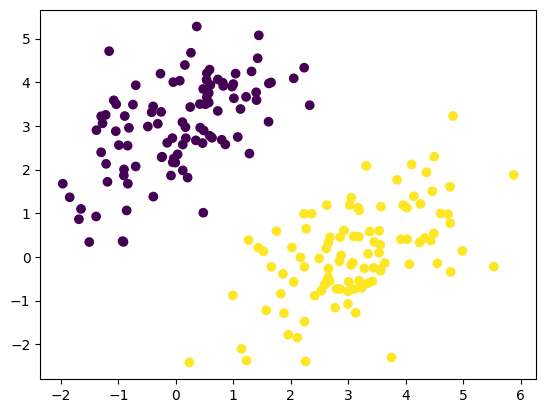

In [58]:
predictions = model(inputs)
plt.scatter(inputs[:,0], inputs[:,1], c=predictions[:, 0] > 0.5)

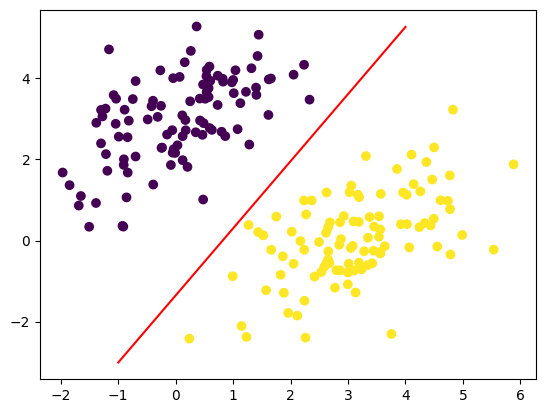

In [59]:
x = np.linspace(-1, 4, 100)
y = - W[0] / W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "r-")
plt.scatter(inputs[:,0], inputs[:,1], c=predictions[:, 0] > 0.5)